# Финальный проект

Финальный проект на курсе по машинному обучению на курсере

В этом ноутбуке предлагается решать задачу предсказания средней цены квадратного метра жилья в некоторых районах Москвы и Московской области. В качестве метрики будем использовать MAPE.

MAPE (Mean Absolute Percentage Error) = $\dfrac{1}{\ell}\sum\limits_{i=1}^{\ell} \left| \dfrac{y_i - a(x_i)}{y_i} \right|$

## Импорт библиотек и чтение данных

In [578]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', rc={'figure.figsize': (16, 8)})

pd.options.display.max_columns = 100

In [579]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

housebase = pd.read_csv('housebase.csv')

In [580]:
housebase = housebase.sample(10000, replace=False)

### train.csv и test.csv

Описание полей в файлах train.csv и test.csv:

**month** - месяц, за который указаны данные в датасете

**city_quadkey** - полигон, его координаты можно его узнать из скрипта quadkey.py

**apartment_ratio** - доля квартир в этом районе в этом месяце со статусом "апартаменты"

**offers_in_sites_ratio** - доля офферов в ЖК в этом районе в этом месяце

**studio_ratio** - доля объявлений о продаже студии среди всех объявлений в этом районе в этом месяце

**rooms_offered_*_ratio** - доля квартир указанной в * комнатности от всех квартир в продаже в этом районе в этом месяце

**unique_active_buildings_count** - количество домов, в которых есть квартиры в продаже в этом районе в этом месяце

**unique_active_building_series_count** - количество уникальных серий домов, в которых есть квартиры в продаже в этом районе в этом месяце

**total_area_avg** - средний метраж продаваемой квартиры в этом районе в этом месяце

**offer_count** - число объявлений о продаже квартир в этом районе в этом месяце

**avg_price_sqm** - средняя цена за квадратный метр в этом районе в этом месяце

### housebase.csv

Описание полей в датасете про базу домов housebase.csv:

**city_quadkey** - полигон, его координаты можно его узнать из скрипта quadkey.py

**building_id** - id дома

**building_series_id** - id серии дома

**unified_address** - адрес дома

**latitude, longitude** - координаты дома

**flats_count** - количество квартир в доме

**has_elevator** - наличие лифта в доме

**ceiling_height** - высота потолков в доме

**build_year** - год постройки дома

**expect_demolition** - дом входит в программу реновации и ожидает сноса

**art_cnt** - количество организаций в сфере искусства (музеи, галереи и т.п.) в этом районе city_quadkey

**beauty_cnt** - количество салонов красоты в этом районе city_quadkey

**cafe_restaurant_eating_out_cnt** - количество точек общественного питания в этом районе city_quadkey

**chain_cnt** - количество сетевых организаций в этом районе city_quadkey

**entertainment_cnt** - количество организаций в сфере развлечений в этом районе city_quadkey

**groceries_and_everyday_items_cnt** - количество продуктовых магазинов в этом районе city_quadkey

**healthcare_cnt** - количество организаций в сфере здравоохранения в этом районе city_quadkey

**laundry_and_repair_services_cnt** - количество прачечных и ремонтных мастерских в этом районе city_quadkey

**shopping_cnt** - количество магазинов в этом районе city_quadkey

**sport_cnt** - количество спортивных организаций в этом районе city_quadkey

In [581]:
train.head()

,month,city_quadkey,apartment_ratio,offers_in_sites_ratio,studio_ratio,rooms_offered_1_ratio,rooms_offered_2_ratio,rooms_offered_3_ratio,rooms_offered_4_more_ratio,total_area_avg,unique_active_buildings_count,unique_active_building_series_count,offer_count,avg_price_sqm,season
0,2017-09-01,120310101003320,0.0,0.0,0.000000,0.666667,0.000000,0.333333,0.000000,46.000000,1,1,3,109930.356771,fall
1,2018-02-01,120310102131112,0.0,0.0,0.000000,0.600000,0.200000,0.000000,0.200000,60.760000,4,2,5,75599.835938,winter
2,2018-10-01,120310121201212,0.0,0.0,0.047619,0.349206,0.428571,0.206349,0.015873,51.480952,13,2,63,48865.313027,fall
3,2017-09-01,120310101102202,0.0,0.0,0.000000,0.486486,0.243243,0.270270,0.000000,49.237838,15,8,37,155280.097128,fall
4,2017-01-01,120310101102301,0.0,0.0,0.000000,0.513514,0.324324,0.135135,0.027027,48.313513,15,8,37,157609.437711,winter


In [582]:
test.head()

,month,city_quadkey,apartment_ratio,offers_in_sites_ratio,studio_ratio,rooms_offered_1_ratio,rooms_offered_2_ratio,rooms_offered_3_ratio,rooms_offered_4_more_ratio,total_area_avg,unique_active_buildings_count,unique_active_building_series_count,offer_count,avg_price_sqm,season
0,2019-07-01,120310101312123,0.0,0.0,0.155556,0.288889,0.288889,0.400000,0.022222,57.248889,16,5,45,165260.927257,summer
1,2019-03-01,120310101021111,0.0,0.0,0.000000,0.142857,0.400000,0.400000,0.057143,58.271429,18,9,35,183111.316071,spring
2,2019-07-01,120310130131211,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,53.000000,1,1,1,33962.265625,summer
3,2019-03-01,120310101012003,0.0,0.0,0.002732,0.265027,0.333333,0.245902,0.153005,87.658033,20,3,366,118424.849983,spring
4,2019-01-01,120310101221032,0.0,0.0,0.000000,0.187500,0.625000,0.187500,0.000000,47.000000,8,4,16,145717.792480,winter


In [583]:
housebase.head()

,city_quadkey,building_id,building_series_id,building_type,unified_address,latitude,longitude,flats_count,has_elevator,ceiling_height,build_year,expect_demolition,art_cnt,beauty_cnt,cafe_restaurant_eating_out_cnt,chain_cnt,entertainment_cnt,groceries_and_everyday_items_cnt,healthcare_cnt,laundry_and_repair_services_cnt,shopping_cnt,sport_cnt
9232,120311002100111,6501263809963818643,0,BRICK,"Россия, Московская область, городской округ Ша...",55.555733,39.811760,0,0,2.50,NaN,0,2.0,NaN,NaN,5.0,3.0,7.0,2.0,1.0,1.0,NaN
3335,120310113122201,4465347359512352861,0,NaN,"Россия, Московская область, Егорьевск, улица А...",55.378281,39.040253,0,0,NaN,NaN,0,10.0,33.0,11.0,178.0,7.0,50.0,14.0,48.0,142.0,4.0
9348,120310101012311,7185711875385331609,663298,PANEL,"Россия, Москва, Ангарская улица, 25",55.877159,37.518593,118,0,2.48,1969.0,1,8.0,18.0,10.0,86.0,12.0,43.0,13.0,27.0,13.0,3.0
9035,120310103031031,7165190497461328645,0,NaN,"Россия, Московская область, Подольск, Мраморна...",55.440731,37.563408,0,0,NaN,1989.0,0,NaN,5.0,NaN,6.0,4.0,6.0,NaN,3.0,1.0,1.0
3144,120310103031222,8555941552269514825,0,BRICK,"Россия, Московская область, Подольск, Народная...",55.414211,37.538822,0,0,3.00,1959.0,0,2.0,5.0,2.0,12.0,4.0,27.0,3.0,9.0,8.0,1.0


In [584]:
f'Количество объектов в train {len(train)}, в test {len(test)}, количество записей в housebase {len(housebase)}.'

'Количество объектов в train 40000, в test 10000, количество записей в housebase 10000.'

## EDA

Посмотрим есть ли пропуски в данных:

In [585]:
train.isna().sum()

month                                  0
city_quadkey                           0
apartment_ratio                        0
offers_in_sites_ratio                  0
studio_ratio                           0
rooms_offered_1_ratio                  0
rooms_offered_2_ratio                  0
rooms_offered_3_ratio                  0
rooms_offered_4_more_ratio             0
total_area_avg                         0
unique_active_buildings_count          0
unique_active_building_series_count    0
offer_count                            0
avg_price_sqm                          0
season                                 0
dtype: int64

In [586]:
test.isna().sum()

month                                  0
city_quadkey                           0
apartment_ratio                        0
offers_in_sites_ratio                  0
studio_ratio                           0
rooms_offered_1_ratio                  0
rooms_offered_2_ratio                  0
rooms_offered_3_ratio                  0
rooms_offered_4_more_ratio             0
total_area_avg                         0
unique_active_buildings_count          0
unique_active_building_series_count    0
offer_count                            0
avg_price_sqm                          0
season                                 0
dtype: int64

In [587]:
housebase.isna().sum()

city_quadkey                           0
building_id                            0
building_series_id                     0
building_type                       1988
unified_address                        0
latitude                               0
longitude                              0
flats_count                            0
has_elevator                           0
ceiling_height                      5837
build_year                          2634
expect_demolition                      0
art_cnt                             2452
beauty_cnt                          2038
cafe_restaurant_eating_out_cnt      2519
chain_cnt                            634
entertainment_cnt                   1131
groceries_and_everyday_items_cnt     795
healthcare_cnt                      1708
laundry_and_repair_services_cnt     1208
shopping_cnt                        1756
sport_cnt                           1732
dtype: int64

Посмотрим на типы колонок:

In [588]:
train.dtypes

month                                   object
city_quadkey                             int64
apartment_ratio                        float64
offers_in_sites_ratio                  float64
studio_ratio                           float64
rooms_offered_1_ratio                  float64
rooms_offered_2_ratio                  float64
rooms_offered_3_ratio                  float64
rooms_offered_4_more_ratio             float64
total_area_avg                         float64
unique_active_buildings_count            int64
unique_active_building_series_count      int64
offer_count                              int64
avg_price_sqm                          float64
season                                  object
dtype: object

In [589]:
test.dtypes

month                                   object
city_quadkey                             int64
apartment_ratio                        float64
offers_in_sites_ratio                  float64
studio_ratio                           float64
rooms_offered_1_ratio                  float64
rooms_offered_2_ratio                  float64
rooms_offered_3_ratio                  float64
rooms_offered_4_more_ratio             float64
total_area_avg                         float64
unique_active_buildings_count            int64
unique_active_building_series_count      int64
offer_count                              int64
avg_price_sqm                          float64
season                                  object
dtype: object

In [590]:
housebase.dtypes

city_quadkey                          int64
building_id                           int64
building_series_id                    int64
building_type                        object
unified_address                      object
latitude                            float64
longitude                           float64
flats_count                           int64
has_elevator                          int64
ceiling_height                      float64
build_year                          float64
expect_demolition                     int64
art_cnt                             float64
beauty_cnt                          float64
cafe_restaurant_eating_out_cnt      float64
chain_cnt                           float64
entertainment_cnt                   float64
groceries_and_everyday_items_cnt    float64
healthcare_cnt                      float64
laundry_and_repair_services_cnt     float64
shopping_cnt                        float64
sport_cnt                           float64
dtype: object

Разделим признаки на несколько групп:

**-1:** `avg_price_sqm` (средняя цена, наша целевая переменная)

**0:** `city_quadkey`, `month` (район и месяц, для чего мы предсказываем)

**1:** `apartment_ratio`, `offers_in_sites_ratio`, `studio_ratio`, `rooms_offered_1_ratio`, `rooms_offered_2_ratio`, `rooms_offered_3_ratio`, `rooms_offered_4_more_ratio`, `total_area_avg` (описание объвлений на районе в этом месяце тип 1, из train)

**2:** `unique_active_buildings_count`, `unique_active_building_series_count`, `offer_count` (описание объявлений на районе в этом месяце тип 2, из train)

**3:** `beauty_cnt`, `shopping_cnt`, `cafe_restaurant_eating_out_cnt`, `entertainment_cnt`, `sport_cnt`, `chain_cnt`, `groceries_and_everyday_items_cnt`, `art_cnt`, `healthcare_cnt`, `laundry_and_repair_services_cnt` (описание района, из housebase)

**4:** `building_id`, `building_series_id`, `building_type`, `unified_address`, `flats_count`, `expect_demolition`, `ceiling_height`, `has_elevator`, `build_year` + `latitude`, `longitude` (описание дома, из housebase)

### Группа -1

Постройте график распределения целевой переменной (`avg_price_sqm`). Здесь и далее лучше использовать функцию `distplot` из библиотеки `seaborn` с параметром ```kde=False```.

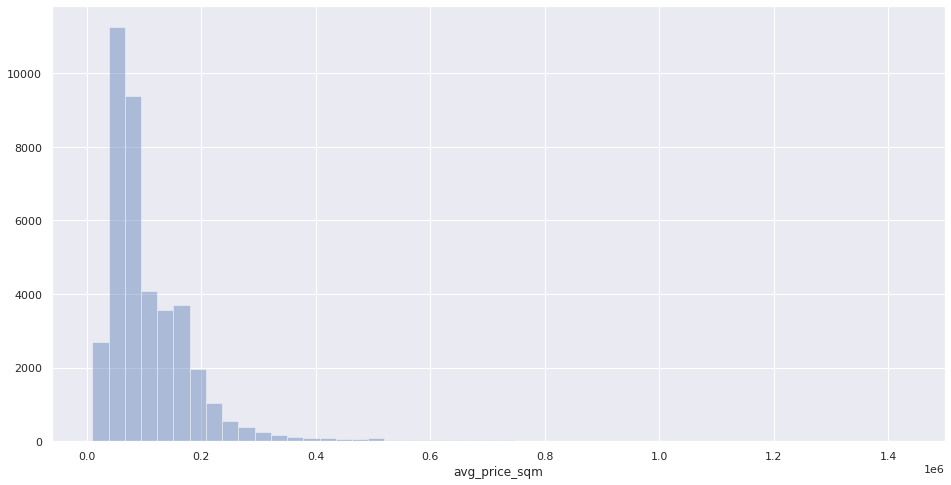

In [591]:
### YOUR CODE HERE
sns.distplot(train.avg_price_sqm, kde = False);

### Группа 0

- Выведите все уникальные значения месяцев в датасете, пересекаются ли они в обучающей и тестовой выборке?
- Постройте график распределения количества объявлений в зависимости от месяца для обучающей выборки.
- Посчитайте сколько уникальных районов представлено в датасете, в обучающей и тестовой выборке. Есть ли в тестовой выборке новые районы?

In [592]:
### YOUR CODE HERE
train['month'] = pd.to_datetime(train['month'])
test['month'] = pd.to_datetime(test['month'])
train['month_name'] = train.month.dt.month
test['month_name'] = test.month.dt.month

Text(0.5, 1.0, 'Train Month Distribution')

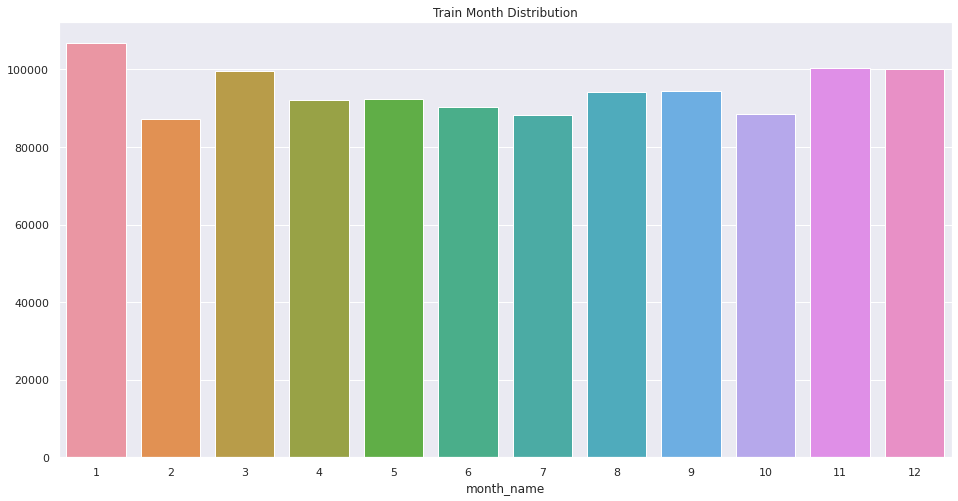

In [593]:
dist_month_train = train.groupby('month_name').offer_count.sum()
dist_month_test = test.groupby('month_name').offer_count.sum()
sns.barplot(x = dist_month_train.index, y = dist_month_train.values)
plt.title('Train Month Distribution')

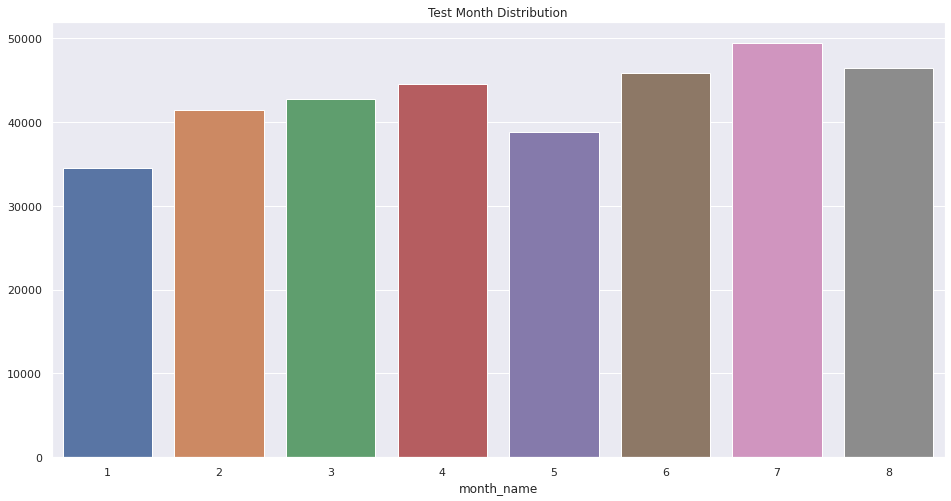

In [594]:
sns.barplot(x = dist_month_test.index, y = dist_month_test.values)
plt.title('Test Month Distribution');

Запишите в переменные (`train_nunique_month` и `train_nunique_quadkey`) количество уникальных значений в обучающей выборке для признаков `month` и `city_quadkey`.

In [595]:
# your code here
train_nunique_quadkey = train.city_quadkey.nunique()
train_nunique_month = train.month.nunique()

In [596]:
### GRADING, RUN TO TEST

train_nunique_month
train_nunique_quadkey


6326

### Группа 1

Для каждого признака постройте график распределения. Есть ли какие-то неинформативные признаки, которые можно сразу выбросить?

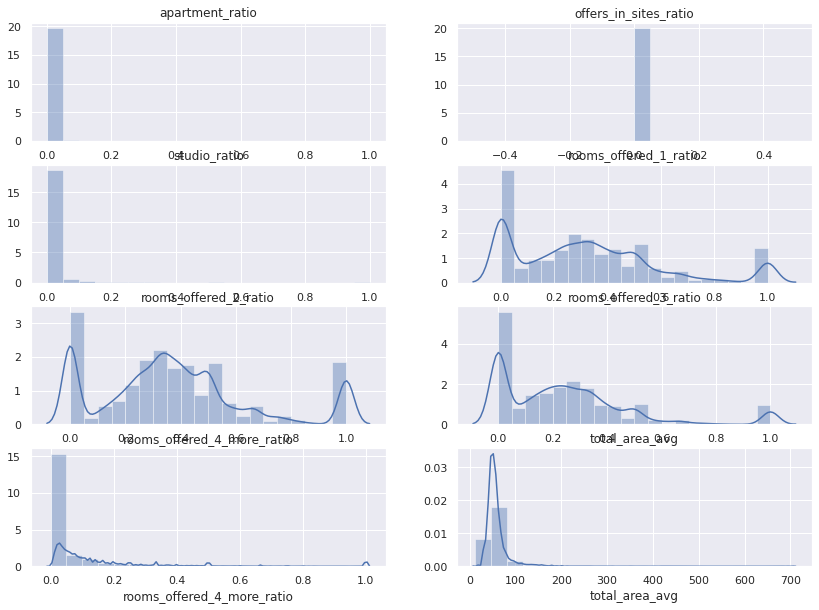

In [597]:
### YOUR CODE HERE
group_1 = train[['apartment_ratio', 'offers_in_sites_ratio',
                 'studio_ratio', 'rooms_offered_1_ratio', 
                 'rooms_offered_2_ratio', 'rooms_offered_3_ratio', 
                 'rooms_offered_4_more_ratio', 'total_area_avg']]

plt.figure(figsize=(14,10))
for i, n in zip(group_1.columns, np.arange(1,len(group_1.columns)+1)):
    plt.subplot(4,2,n)
    sns.distplot(group_1[i], bins=20)
    plt.title(i)

Запишите в переменную `unwanted_cols` список с признаком, который можно будет удалить.

In [598]:
# your code here
unwanted_cols = ['apartment_ratio','offers_in_sites_ratio','rooms_offered_1_ratio']

In [599]:
### GRADING

unwanted_cols


['apartment_ratio', 'offers_in_sites_ratio', 'rooms_offered_1_ratio']

### Группа 2

Для каждого признака постройте график распределения. Есть ли какие-то неинформативные признаки, которые можно сразу выбросить? Добавьте их в список `unwanted_cols`.

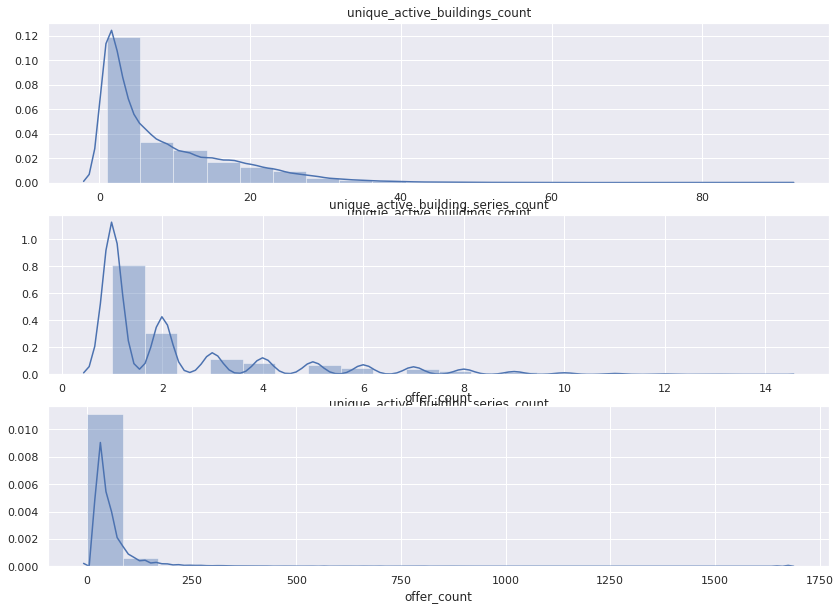

In [600]:
### YOUR CODE HERE
group_2 = train[['unique_active_buildings_count', 'unique_active_building_series_count', 'offer_count']]

plt.figure(figsize=(14,10))
for i, n in zip(group_2.columns, np.arange(1,len(group_1.columns)+1)):
    plt.subplot(3,1,n)
    sns.distplot(group_2[i], bins=20)
    plt.title(i)

### Группа 3

Для каждого признака постройте график распределения. 

Так как в этой группе признаки содержат информацию про количество тех или иных объектов на районе, физический смысл отсутствия информации - на районе нет таких объектов. В дальнейшем мы воспользуемся этой идеей для заполнения пропусков.

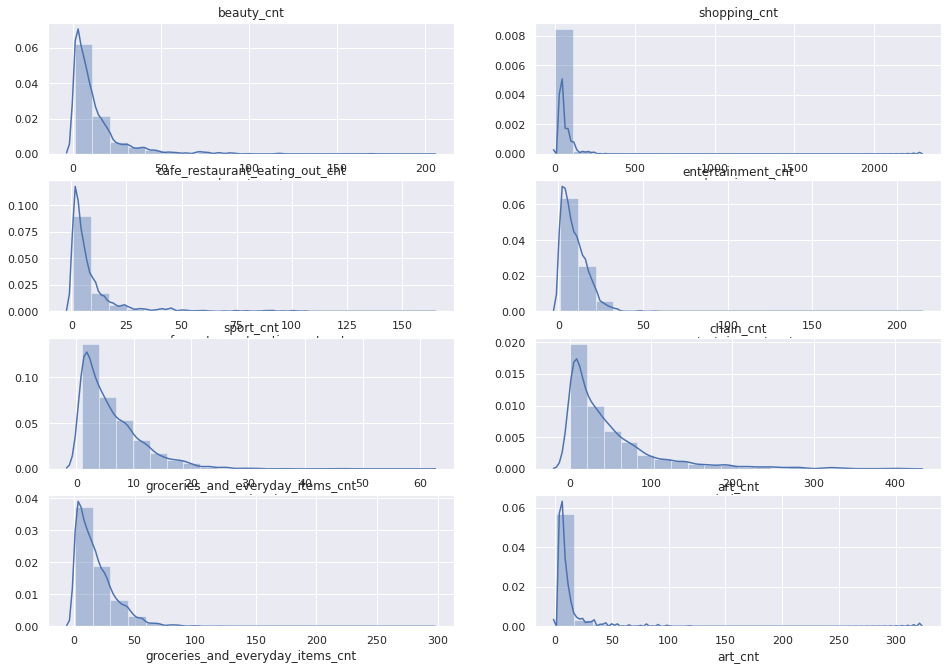

In [601]:
### YOUR CODE HERE
group_3 = housebase[['beauty_cnt', 'shopping_cnt', 
                     'cafe_restaurant_eating_out_cnt', 'entertainment_cnt', 
                     'sport_cnt', 'chain_cnt', 'groceries_and_everyday_items_cnt', 
                     'art_cnt', 'healthcare_cnt', 'laundry_and_repair_services_cnt']]

plt.figure(figsize=(16,14))
for i, n in zip(group_3.columns, np.arange(1,len(group_1.columns)+1)):
    plt.subplot(5,2,n)
    sns.distplot(group_3[i], bins=20)
    plt.title(i)

### Группа 4

- Постройте график распределения для  `building_id`.
- Постройте графики распределения для `building_series_id` и `building_type`.
- Постройте графики распределения для `flats_count`, `ceiling_height` и `build_year`.
- Постройте графики распределения для `has_elevator` и `expect_demolition`.

Выберите какие множества признаков, из указанных выше, нужно отнести к категориальным, какие к вещественным, а какое удалить. Признаки для удаления добавьте в `unwanted_cols`.


Признаки `latitude` и `longitude` пока счаитайте вещественными признаками.



In [602]:
### YOUR CODE HERE
group_4 = housebase[['building_id', 'building_series_id', 
                     'building_type', 'unified_address', 
                     'flats_count', 'expect_demolition', 
                     'ceiling_height', 'has_elevator', 'build_year',
                     'latitude', 'longitude']]
group_4_plot = group_4[['building_id','building_series_id','building_type', 
                       'flats_count', 'ceiling_height', 'build_year',
                       'has_elevator', 'expect_demolition']]

unwanted_cols.append(['building_id','building_series_id'])

### Деление на категориальные и вещественные

Учитывая

- Вывод функции dtypes
- Ваши выводы из графиков по группе 4
- Список `unwated_cols` (их не включайте)

Выделите все категориальные признаки, запишите их в переменные `cat_features`. Также мы проверим список `unwanted_cols`. Все остальные признаки занесите в список `real_features`. **Признак `city_quadkey` и целевую переменную `avg_price_sqm` никуда не вносите.**

In [603]:
train = train.drop('month_name', axis=1)
test = test.drop('month_name', axis=1)

In [604]:
unwanted_cols

['apartment_ratio',
 'offers_in_sites_ratio',
 'rooms_offered_1_ratio',
 ['building_id', 'building_series_id']]

In [605]:
# your code here
cat_features = ['building_type','month', 'season', 'build_year', 'unified_address']
real_features = ['studio_ratio', 'rooms_offered_2_ratio',
                 'rooms_offered_3_ratio', 'rooms_offered_4_more_ratio',
                 'total_area_avg','unique_active_buildings_count', 
                 'unique_active_building_series_count','offer_count',
                 'beauty_cnt', 'shopping_cnt', 'cafe_restaurant_eating_out_cnt',
                 'entertainment_cnt', 'sport_cnt', 'chain_cnt',
                 'groceries_and_everyday_items_cnt', 'art_cnt', 'healthcare_cnt',
                 'laundry_and_repair_services_cnt', 'latitude', 'longitude',
                 'flats_count', 'expect_demolition', 'ceiling_height', 'has_elevator']
unwanted_cols = ['apartment_ratio','offers_in_sites_ratio', 'rooms_offered_1_ratio', 'building_id', 'building_series_id']

In [606]:
### GRADING

# checking for same number of columns
# -3 is for city_quadkey and avg_price_sqm
assert len(unwanted_cols) + len(cat_features) + len(real_features)\
        == len(train.columns) + len(housebase.columns) - 3

print('... TESTING ...')


... TESTING ...


## Генерация признаков

Сгенерируем несколько новых признаков, разделим их на несколько групп:

- Отсутствие информации про район/дом
- Находится ли дом в Москве
- Расстояние до центра города
- Находится ли дом внутри колец
- Время года

Не забывайте добавлять новые признаки в списки `cat_features` или `real_features`.

### Отсутствие информации про район/дом

Вспомните признаки из группы 3 и группы 4, для **каждого** признака (для простоты даже для тех, у которых нет пропусков) сделайте бинарный признак, который будет обозначать, что информация отсутствует, назовите их `col_name + '_isna'`. Создавать новые признаки стоит в `housebase`. Не создавайте признаки для `unwanted_cols`. Куда стоит отнести новые признаки? Добавьте их в список категориальных или вещественных признаков (`cat_features` или `real_features`).

Заполните пропуски: для категориальных новым значением `UNKNOWN`, для вещественных нулём.

In [607]:
# your code here
cols = list(group_3.columns.append(group_4.columns))
cols.remove('building_id') 
cols.remove('building_series_id')

In [608]:
for i in cols:
    housebase[i + '_isna'] = housebase[i].isna()

In [609]:
housebase.shape

(10000, 41)

In [610]:
for i in housebase.columns:
    if housebase[i].dtype == 'int64' or housebase[i].dtype == 'float64':
        housebase[i] = housebase[i].fillna(0)
    if housebase[i].dtype == 'object':
        housebase[i] = housebase[i].fillna('UNKNOWN')

In [611]:
housebase.isna().sum().sum()

0

In [612]:
### GRADING

for col in ['art_cnt', 'beauty_cnt', 'cafe_restaurant_eating_out_cnt', 'chain_cnt', 'entertainment_cnt', 'groceries_and_everyday_items_cnt', 'healthcare_cnt', 'laundry_and_repair_services_cnt', 'shopping_cnt', 'sport_cnt']:
    assert col + '_isna' in housebase.columns
# Проверка для признаков из группы 4 скрыта
    
print('... TESTING ...')


... TESTING ...


### Находится ли дом в Москве

Сделайте новый бинарный признак, который будет обозначать находится ли дом в Москве, назовите его `is_in_Moscow`. Для этого стоит анализировать уже имеющийся признак `unified_address`. Добавьте новый признак в соответствующий список.

In [613]:
# your code here
housebase['is_in_Moscow'] = housebase.unified_address.apply(lambda x: x.split(' ')[1])
housebase['is_in_Moscow'] = (housebase['is_in_Moscow'] == 'Москва,')

In [614]:
### GRADING

assert 'is_in_Moscow' in housebase.columns

print('... TESTING ...')


... TESTING ...


### Расстояние до центра города

Создайте новый вещественный признак, который будет равен расстоянию (по формуле haversine) от дома до Кремля, назовите его `center_dist`. Координаты Кремля: (55.7528, 37.6178). Добавьте признак в список категориальных или вещественных.

In [615]:
pip install haversine

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [616]:
# your code here
from haversine import haversine, Unit

matr = []
for i, j in zip(housebase.latitude, housebase.longitude):
    matr.append((i,j))

cremle = (55.7528, 37.6178)
cremle = [cremle] * 10000

In [617]:
center_dist = []
n=0
for i, j in zip(matr, cremle):
    center_dist.append(haversine(matr[n], cremle[n]))
    n+=1


In [618]:
housebase['center_dist'] = center_dist

In [619]:
### GRADING

assert 'center_dist' in housebase.columns

print('... TESTING ...')


... TESTING ...


### Находится ли дом внутри колец

Создайте три новых бинарных признака - находится ли дом внутри Бульварного, Садового или Третьего Транспортного Кольца. Для этого стоит сравнить уже полученное расстояние до Кремля с 1.5, 3 и 6 километрами, соответственно. Назовите их `ring_1`, `ring_2` и `ring_3` соответственно. Добавьте в список категориальных или вещественных.

In [620]:
# your code here
housebase['ring_1'] = housebase['center_dist'] <= 1.5
housebase['ring_2'] = housebase['center_dist'] <= 3
housebase['ring_3'] = housebase['center_dist'] <= 6

In [621]:
unwanted_cols

['apartment_ratio',
 'offers_in_sites_ratio',
 'rooms_offered_1_ratio',
 'building_id',
 'building_series_id']

In [622]:
cat_features = ['building_id', 'building_series_id','building_type','month', 'season',
                'build_year', 'unified_address','has_elevator','beauty_cnt_isna', 'shopping_cnt_isna',
       'cafe_restaurant_eating_out_cnt_isna', 'entertainment_cnt_isna',
       'sport_cnt_isna', 'chain_cnt_isna',
       'groceries_and_everyday_items_cnt_isna', 'art_cnt_isna',
       'healthcare_cnt_isna', 'laundry_and_repair_services_cnt_isna',
       'building_type_isna', 'unified_address_isna', 'flats_count_isna', 'expect_demolition_isna',
       'ceiling_height_isna', 'has_elevator_isna', 'build_year_isna',
       'latitude_isna', 'longitude_isna', 'is_in_Moscow', 'ring_1', 'ring_2', 'ring_3', 'offers_in_sites_ratio']

In [623]:
real_features = ['apartment_ratio',
    'studio_ratio',
 'rooms_offered_1_ratio',
 'rooms_offered_2_ratio',
 'rooms_offered_3_ratio',
 'rooms_offered_4_more_ratio',
 'total_area_avg',
 'unique_active_buildings_count',
 'unique_active_building_series_count',
 'offer_count',
 'beauty_cnt',
 'shopping_cnt',
 'cafe_restaurant_eating_out_cnt',
 'entertainment_cnt',
 'sport_cnt',
 'chain_cnt',
 'groceries_and_everyday_items_cnt',
 'art_cnt',
 'healthcare_cnt',
 'laundry_and_repair_services_cnt',
 'latitude',
 'longitude',
 'flats_count',
 'expect_demolition',
 'ceiling_height',
 'centet_dist']

## Проверка разделения на категориальные и вещественные признаки

После очередных преобразований признаков, проверим, правильные ли у Вас получились списки признаков:

In [624]:
### GRADING

assert len(cat_features) == 32
assert len(real_features) == 26

print('... TESTING ...')


... TESTING ...


## Подготовка данных для обучения

Теперь нам надо объединить обе таблички, чтобы добавить информацию про дома для каждого района. Перед тем как объединять таблички нам нужно будет создать для каждого района образ "среднего" дома по району.

Для этого мы для каждого категориального признака возьмем моду, для каждого вещественного медиану.

Произведите вышеописанные манипуляции с housebase.

In [667]:
import scipy

real_housebase = np.intersect1d(real_features, housebase.columns)
cat_housebase = np.intersect1d(cat_features, housebase.columns)


def combine_housebase(quadkeys_):
    groups = housebase.loc[housebase['city_quadkey'].isin(quadkeys_)].groupby('city_quadkey')
    
    real_cols = []
    
    for col in real_housebase:  # USE median
        # your code here
        real_cols.append(np.median(housebase[col]))
        
    cat_cols = []  # USE pd.Series.mode and agg

    # your code here
    for col in cat_housebase:
        if pd.Series.mode(housebase[col]).shape != housebase[col].shape:
            cat_cols.append(pd.Series.mode(housebase[col]))

    return pd.concat(real_cols + cat_cols, axis=1).reset_index(drop=False)

In [644]:
cat_housebase

array(['art_cnt_isna', 'beauty_cnt_isna', 'build_year', 'build_year_isna',
       'building_id', 'building_series_id', 'building_type',
       'building_type_isna', 'cafe_restaurant_eating_out_cnt_isna',
       'ceiling_height_isna', 'chain_cnt_isna', 'entertainment_cnt_isna',
       'expect_demolition_isna', 'flats_count_isna',
       'groceries_and_everyday_items_cnt_isna', 'has_elevator',
       'has_elevator_isna', 'healthcare_cnt_isna', 'is_in_Moscow',
       'latitude_isna', 'laundry_and_repair_services_cnt_isna',
       'longitude_isna', 'ring_1', 'ring_2', 'ring_3',
       'shopping_cnt_isna', 'sport_cnt_isna', 'unified_address',
       'unified_address_isna'], dtype=object)

In [665]:
pd.Series.mode(housebase['building_id']).shape == housebase['building_id'].shape

True

In [668]:
combine_housebase(housebase['city_quadkey'].unique())

TypeError: cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid

In [632]:
housebase_n = combine_housebase(housebase['city_quadkey'].unique())

TypeError: cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid

In [ ]:
def fix_multiple_modes(x):
    if isinstance(x, (list, tuple, np.ndarray)):
        return x[0]
    return x

housebase['building_type'] = housebase['building_type'].apply(fix_multiple_modes)

In [641]:
### GRADING

assert len(housebase) == housebase['city_quadkey'].nunique()

print('... TESTING ...')


AssertionError: 

In [ ]:
train_data = train.join(housebase.set_index('city_quadkey'), on='city_quadkey', how='left')
test_data = test.join(housebase.set_index('city_quadkey'), on='city_quadkey', how='left')

train_data.dropna(inplace=True, axis=0)
test_data.dropna(inplace=True, axis=0)

Преобразуем тип object в str:

In [ ]:
train_data['building_type'] = train_data['building_type'].astype(str)
test_data['building_type'] = test_data['building_type'].astype(str)

Добавим еще один вещественный признак - возраст дома.

In [ ]:
train_data['build_year'] = train_data['month'].str.split('-').map(lambda x: x[0]).astype(int) - train_data['build_year']
test_data['build_year'] = test_data['month'].str.split('-').map(lambda x: x[0]).astype(int) - test_data['build_year']

Разделим данные на признаки и целевую переменную.

In [ ]:
x_train, y_train = train_data.drop(['avg_price_sqm'], axis=1), train_data[['avg_price_sqm']].values.ravel()
x_test, y_test = test_data.drop(['avg_price_sqm'], axis=1), test_data[['avg_price_sqm']].values.ravel()

В качестве бейзлайна возьмем значение нашей метрики (MAPE) для медианы обучающей выборки:

In [ ]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
y_dummy = np.median(y_train)

f'MAPE baseline: TRAIN {mape(y_train, y_dummy):.2f}, TEST {mape(y_test, y_dummy):.2f}'

## Перебор гиперпараметров

Заполните пропуски в функции для поиска лучших гиперпараметров для модели.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [ ]:
from sklearn.metrics import make_scorer


scorer = make_scorer(mape, greater_is_better=False)

lb = LabelEncoder().fit(x_train['building_type'].values)

x_train['building_type'] = lb.transform(x_train['building_type'].values)
x_test['building_type'] = lb.transform(x_test['building_type'].values)


def hyperopt(estimator, params):
    column_transformer = ColumnTransformer(  # OHE for cat, Scaler for real
        [
            # your code here
            
        ], n_jobs=4
    )
    
    pipeline = Pipeline(  # column transformer and then model
        steps=[
            # your code here
            
        ]
    )
    
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        scoring=scorer,
        cv=3
    )
    
    grid.fit(x_train, y_train)
    
    # write best params to `best_params`
    # your code here
    
    
    column_transformer = ColumnTransformer(  # OHE for cat, Scaler for real
        [
            # your code here
            
        ], n_jobs=4
    )
    
    pipeline = Pipeline(  # column transformer and then model with `best_params` as params
        steps=[
            # your code here
            
        ]
    )
    
    pipeline.fit(x_train, y_train)
    
    score_train = mape(y_train, pipeline.predict(x_train))
    score_test = mape(y_test, pipeline.predict(x_test))
    
    return score_train, score_test, best_params

In [ ]:
### GRADING

print('... TESTING ...')


## Сравнение моделей

Подберите для каждой из следующих моделей лучшие гиперпараметры **с помощью функции, которую вы написали выше.**

- Линейная модель с l2 регуляризацией
- Решающее дерево
- Случайный лес
- Градиентный бустинг
- Метод ближайших соседей

### Линейная модель с l2 регуляризацией

Попробуйте исследовать влияние `alpha` и `max_iter` на результат.

In [ ]:
from sklearn.linear_model import Ridge


### YOUR CODE HERE

Запишите в переменную `best_params_ridge` ваши лучшие гиперпараметры для `Ridge`. Создайте словарь parameter:value.

In [ ]:
# your code here


In [ ]:
### GRADING

best_params_ridge

print('... TESTING ...')


### Решающее дерево

Попробуйте исследовать влияние `max_depth`, `min_samples_split` и `max_features` на результат.

In [ ]:
from sklearn.tree import DecisionTreeRegressor


### YOUR CODE HERE

Запишите в переменную `best_params_dt` ваши лучшие гиперпараметры для `DecisionTreeRegressor`. Создайте словарь parameter:value.

In [ ]:
# your code here


In [ ]:
### GRADING

best_params_dt

print('... TESTING ...')


### Случайный лес

Попробуйте исследовать влияние `n_estimators`, `max_depth`, `min_samples_split` и `max_features` на результат. Создайте словарь parameter:value.

In [ ]:
from sklearn.ensemble import RandomForestRegressor


### YOUR CODE HERE

Запишите в переменную `best_params_rf` ваши лучшие гиперпараметры для `RandomForestRegressor`. Создайте словарь parameter:value, а также добавьте туда n_jobs:-1.

In [ ]:
# your code here


In [ ]:
### GRADING

best_params_rf

print('... TESTING ...')


### Градиентный бустинг

Попробуйте исследовать влияние `n_estimators`, `learning_rate`, `subsample` и `min_samples_split` на результат. Создайте словарь parameter:value.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


### YOUR CODE HERE

Запишите в переменную `best_params_gb` ваши лучшие гиперпараметры для `GradientBoostingRegressor`. Создайте словарь parameter:value.

In [ ]:
# your code here


In [ ]:
### GRADING

best_params_gb

print('... TESTING ...')
